In [1]:
# Imports
import qiskit
import networkx as nx
import min_swap_functions as msf
import importlib
importlib.reload(msf)


<module 'min_swap_functions' from '/Users/sambringman/Documents/GitHub/MinimumSwapAlgorithm/min_swap_functions.py'>

In [2]:
# Set up the circuit
path = "test_circuits/3_17_13.qasm"

qc = qiskit.QuantumCircuit.from_qasm_file(path)
qc.draw()

# Set up the lattice
width = 4
height = 4

grid = True
hex = False

if grid == True:
    lattice = nx.grid_2d_graph(width, height)

    lattice = msf.add_node_details_grid(lattice, width, height)
elif hex == True:
    lattice = nx.hexagonal_lattice_graph(width, height)
    lattice = msf.add_node_details_hex(lattice)
else:
    print("No graph type chosen")




In [3]:
# Go through the quantum circuit and make a list of all the qubits that need to be entangled, in order

# Short form - each entry is one of the gates of the circuit
entangle_list = [(gate[1][0].index, gate[1][1].index) for gate in qc.data if len(gate[1]) == 2]

# Long form
"""
single_q = 0
double_q = 0
triple_q = 0
entangle_list = []

for gate in qc.data:
    if len(gate[1]) == 1:
        single_q += 1
    elif len(gate[1]) == 2:
        double_q += 1
        entangle_list.append((gate[1][0].index, gate[1][1].index))
    elif len(gate[1]) == 3:
        triple_q += 1
    else:
        print("Error, gate larger than 3 qubits")
"""

print(f"List of entanglements in order:\n\t{entangle_list}")

# Gets a list of qubits
max_qubit1 = max(qubit1 for qubit1, qubit2 in entangle_list)
max_qubit2 = max(qubit2 for qubit1, qubit2 in entangle_list)
num_qubits = max(max_qubit1, max_qubit2) + 1
qubits = [i for i in range(num_qubits)]
print(f"\nQubits: {qubits}")

List of entanglements in order:
	[(0, 2), (2, 1), (2, 1), (0, 2), (1, 0), (1, 2), (0, 2), (1, 0), (2, 1), (1, 0), (2, 1), (0, 2), (0, 1), (2, 1), (0, 2), (1, 0), (1, 2)]

Qubits: [0, 1, 2]


<ipython-input-3-9869ee009d25>:4: DeprecationWarning: The property ``qiskit.circuit.bit.Bit.index`` is deprecated as of qiskit-terra 0.17. It will be removed no earlier than 3 months after the release date. Instead, use :meth:`~qiskit.circuit.quantumcircuit.QuantumCircuit.find_bit` to find all the containing registers within a circuit and the index of the bit within the circuit.
  entangle_list = [(gate[1][0].index, gate[1][1].index) for gate in qc.data if len(gate[1]) == 2]


In [4]:
# Place qubits on the graph
lattice = msf.map_qubits(lattice, qubits, entangle_list)

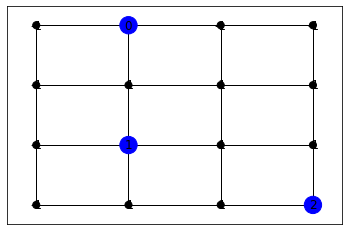

In [5]:
# Display the placement
sizes = list(lattice.nodes[i]['size'] for i in lattice.nodes())
colors = list(lattice.nodes[i]['color'] for i in lattice.nodes())
labels = {i: lattice.nodes[i]['qubit'] for i in lattice.nodes()}
nx.draw_networkx(lattice, pos=lattice.nodes.data('pos'), node_size=sizes, node_color=colors, labels=labels)


In [6]:
# Swap qubits